In [ ]:
#uploadowanie do przestrzeni roboczej 

from google.colab import files

uploaded = files.upload()

Saving lab03.zip to lab03.zip


In [ ]:
#rozpakowywanie zipa

from zipfile import ZipFile

file_name = '/content/lab03.zip' 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


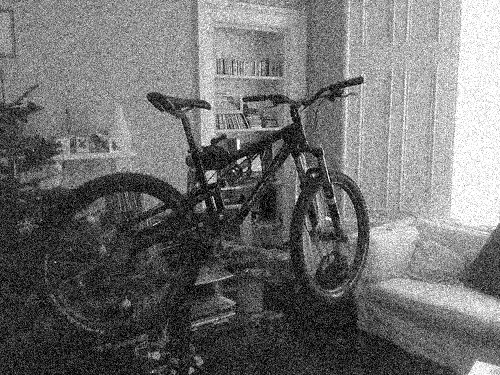

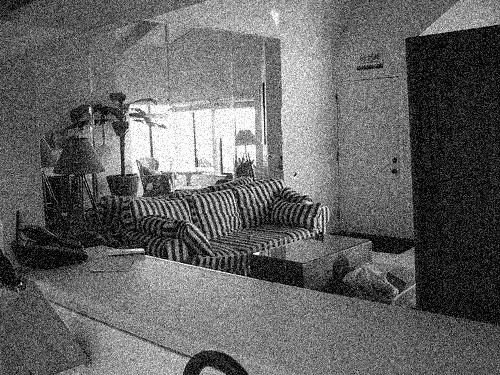

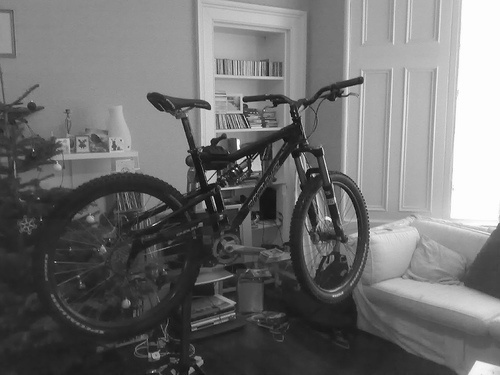

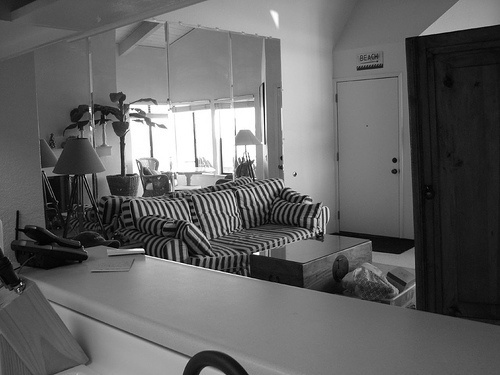

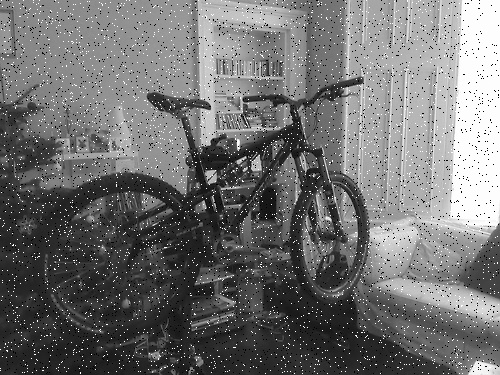

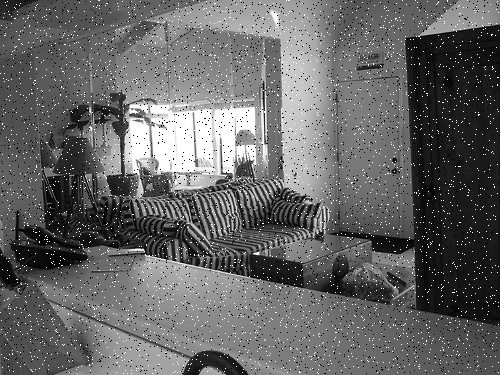

In [ ]:
#wczytywanie i wyswietlanie obrazow

import cv2
from google.colab.patches import cv2_imshow

ga1 = cv2.imread('/content/ga/15.jpg')
cv2_imshow(ga1)

ga2 = cv2.imread('/content/ga/18.jpg')
cv2_imshow(ga2)

gray1 = cv2.imread('/content/gray/15.jpg')
cv2_imshow(gray1)

gray2 = cv2.imread('/content/gray/18.jpg')
cv2_imshow(gray2)

sp1 = cv2.imread('/content/sp/15.jpg')
cv2_imshow(sp1)

sp2 = cv2.imread('/content/sp/18.jpg')
cv2_imshow(sp2)


In [ ]:
# okreslenie wartosci pikseli obrazow
# okreslenie rozmiaru obrazow
# okreslenie min i max wartosci

import numpy as np

ga1_values = np.asarray(ga1)
ga1_shape = np.shape(ga1)
ga1_max = np.max(ga1)
ga1_min = np.min(ga1)
print(ga1_shape, ga1_max, ga1_min)

ga2_values = np.asarray(ga2)
ga2_shape = np.shape(ga2)
ga2_max = np.max(ga2)
ga2_min = np.min(ga2)
print(ga2_shape, ga2_max, ga2_min)

gray1_values = np.asarray(gray1)
gray1_shape = np.shape(gray1)
gray1_max = np.max(gray1)
gray1_min = np.min(gray1)
print(gray1_shape, gray1_max, gray1_min)

gray2_values = np.asarray(gray2)
gray2_shape = np.shape(gray2)
gray2_max = np.max(gray2)
gray2_min = np.min(gray2)
print(gray2_shape, gray2_max, gray2_min)

sp1_values = np.asarray(sp1)
sp1_shape = np.shape(sp1)
sp1_max = np.max(sp1)
sp1_min = np.min(sp1)
print(sp1_shape, sp1_max, sp1_min)

sp2_values = np.asarray(sp2)
sp2_shape = np.shape(sp2)
sp2_max = np.max(sp2)
sp2_min = np.min(sp2)
print(sp2_shape, sp2_max, sp2_min)
print(sp2[1][5])
print(type(sp2_shape[0]))

(375, 500, 3) 255 0
(375, 500, 3) 255 0
(375, 500, 3) 255 1
(375, 500, 3) 255 0
(375, 500, 3) 255 0
(375, 500, 3) 255 0
[42 42 42]
<class 'int'>


In [ ]:
# funkcja do wyrownywania histogramu

def wyrownaj_histogram(img):

  hist,bins = np.histogram(img.flatten(),256,[0,256])
  cdf = hist.cumsum()/len(img.flatten()) 
  length = len(cdf)
  cdf = (cdf - cdf.min())*(length-1)/(1-cdf.min())
  img2 = cdf[img]

  return img2


Zdjecie oryginalne


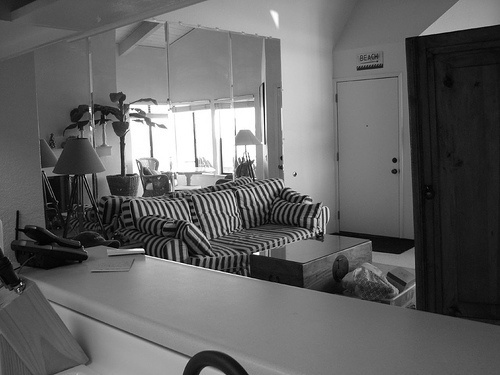

Zdjecie rozciagniete funkcja wlasna


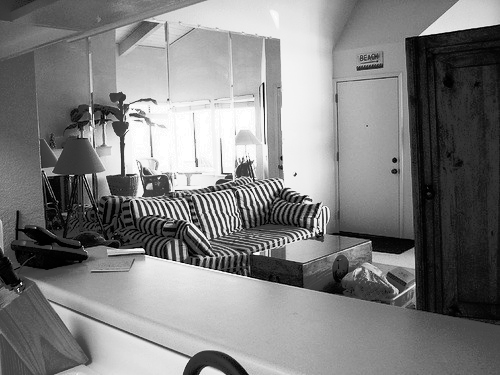

Zdjecie rozciagniete funkcja wbudowana


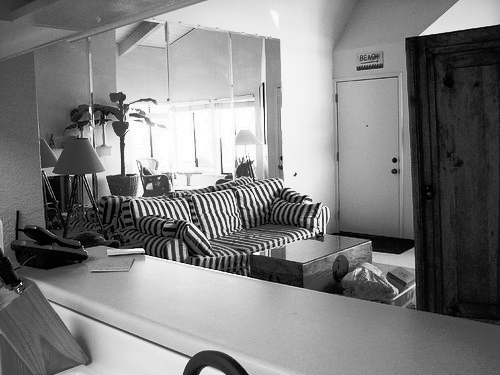

0.0164339542388916           0.0003535747528076172
Zdjecie oryginalne


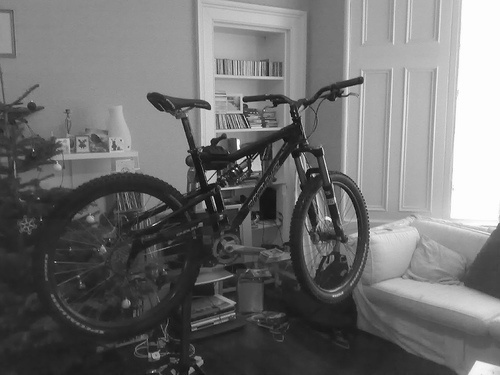

Zdjecie rozciagniete funkcja wlasna


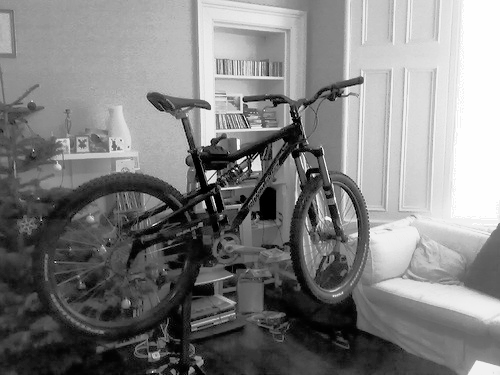

Zdjecie rozciagniete funkcja wbudowana


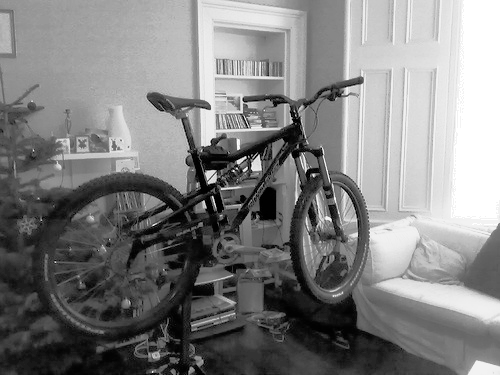

0.017064332962036133           0.000362396240234375


In [ ]:
import time

def porownanie_wyrownania(img):

  start = time.time()
  img_wyrownany = wyrownaj_histogram(img)
  end = time.time()
  time_funkcja_wlasna = end - start
  print('Zdjecie oryginalne')
  cv2_imshow(img)
  print('Zdjecie wyrownane funkcja wlasna')
  cv2_imshow(img_wyrownany)
  src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  start = time.time()
  dst = cv2.equalizeHist(src)
  end = time.time()
  time_funkcja_wbudowana = end - start
  print('Zdjecie wyrownane funkcja wbudowana')
  cv2_imshow(dst)
  print(time_funkcja_wlasna, '         ', time_funkcja_wbudowana)

porownanie_wyrownania(gray2)

porownanie_wyrownania(gray1)

# obie funkcje daja porownywalne wyniki, jesli jednak 
# chodzi o czas wykonywania programu, funkcja wbudowana 
# jest niemal 50 razy szybsza


In [ ]:
# funkcja do rozciagania histogramu

def rozciagnij_histogram(img):

  a = img.max()
  b = img.min()
  new_img =  255*((img - b) / (a-b))
  
  return new_img

Zdjecie oryginalne


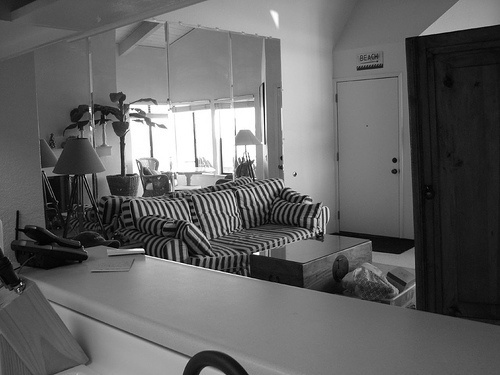

Zdjecie filtrowane funkcja wlasna


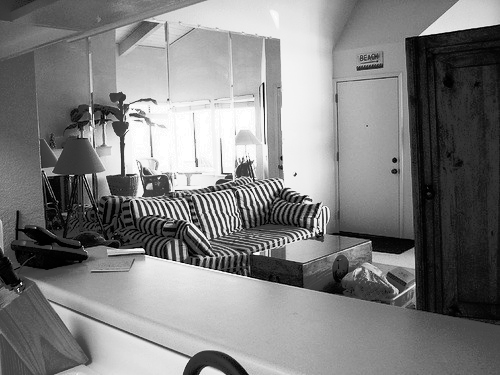

Zdjecie filtrowane funkcja wbudowana


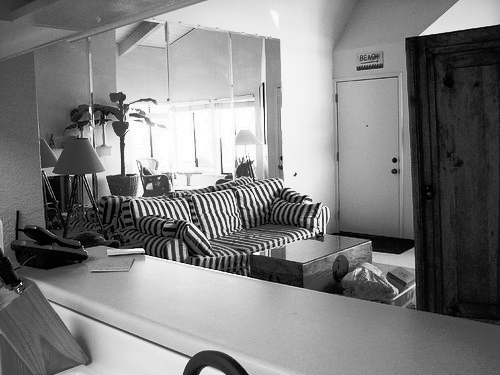

0.01893925666809082           0.0003628730773925781
Zdjecie oryginalne


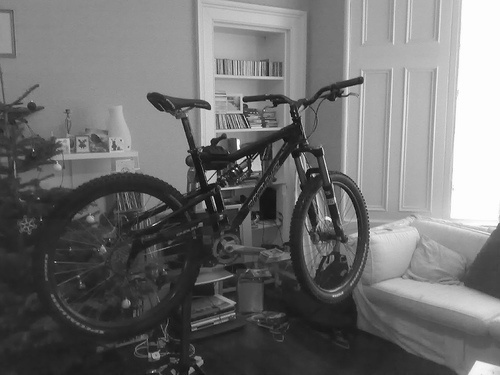

Zdjecie filtrowane funkcja wlasna


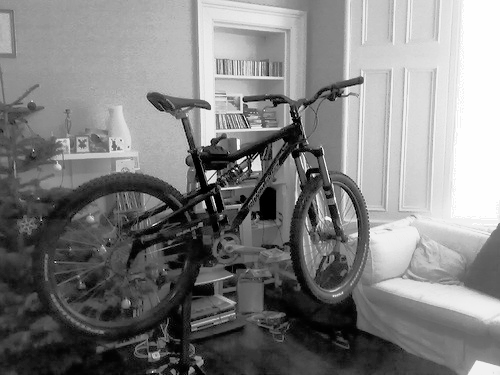

Zdjecie filtrowane funkcja wbudowana


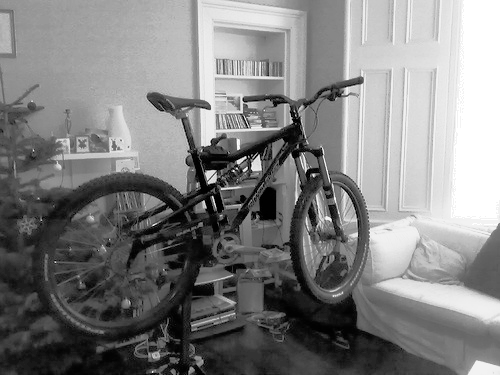

0.01680612564086914           0.0003345012664794922


In [ ]:

def porownanie_rozciagania(img):


  start = time.time()
  img_rozciagniety = wyrownaj_histogram(img)
  end = time.time()
  time_funkcja_wlasna = end - start
  print('Zdjecie oryginalne')
  cv2_imshow(img)
  print('Zdjecie rozciagane funkcja wlasna')
  cv2_imshow(img_rozciagniety)
  src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  start = time.time()
  dst = cv2.equalizeHist(src)
  end = time.time()
  time_funkcja_wbudowana = end - start
  print('Zdjecie rozciagane funkcja wbudowana')
  cv2_imshow(dst)
  print(time_funkcja_wlasna, '         ', time_funkcja_wbudowana)

porownanie_rozciagania(gray2)
porownanie_rozciagania(gray1)

# obie funkcje daja porownywalne wyniki, jesli jednak 
# chodzi o czas wykonywania programu, funkcja wbudowana 
# jest niemal 70 razy szybsza

In [ ]:
def meanFilter_3(img):

  img_new = np.zeros(img.shape)
  w = 1

  for i in range(1,img.shape[0]-1):
      for j in range(1,img.shape[1]-1):
          block = img[i-w:i+w+1, j-w:j+w+1]
          m = np.mean(block)
          img_new[i][j] = int(m)

  return img_new
                  

Zdjecie oryginalne


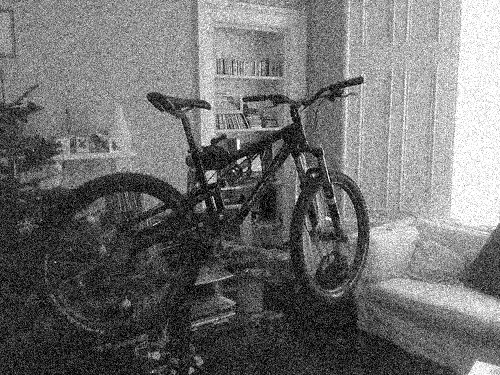

Zdjecie filtrowane funkcja wlasna


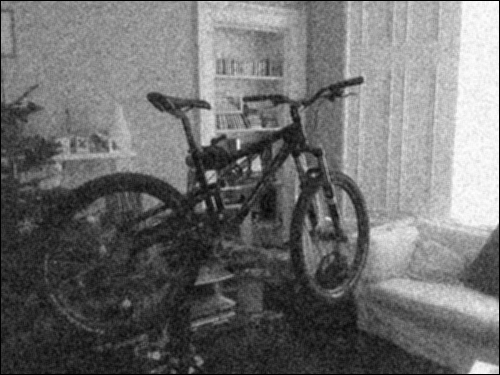

Zdjecie filtrowane funkcja wbudowana


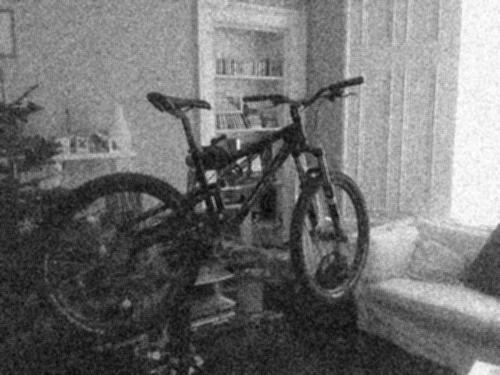

2.040039539337158           0.00044798851013183594
Zdjecie oryginalne


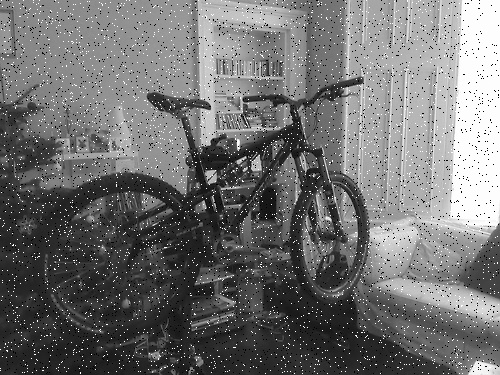

Zdjecie filtrowane funkcja wlasna


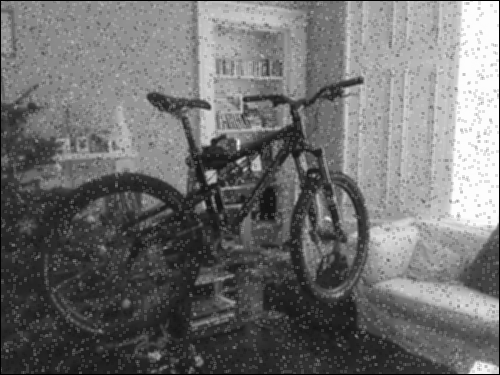

Zdjecie filtrowane funkcja wbudowana


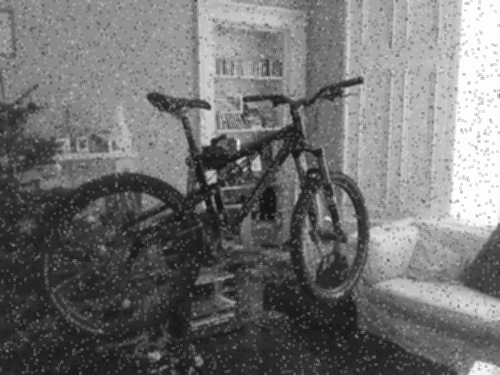

2.2145028114318848           0.00046634674072265625


In [ ]:
def porownanie_mean_3(img):

  start = time.time()
  img_mean_3 = meanFilter_3(img)
  end = time.time()
  time_funkcja_wlasna = end - start
  print('Zdjecie oryginalne')
  cv2_imshow(img)
  print('Zdjecie filtrowane funkcja wlasna')
  cv2_imshow(img_mean_3)
  src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  start = time.time()
  dst = cv2.blur(img,(3, 3))
  end = time.time()
  time_funkcja_wbudowana = end - start
  print('Zdjecie filtrowane funkcja wbudowana')
  cv2_imshow(dst)
  print(time_funkcja_wlasna, '         ', time_funkcja_wbudowana)

porownanie_mean_3(ga1)
porownanie_mean_3(sp1)

# obie funkcje daja porownywalne wyniki, jesli jednak 
# chodzi o czas wykonywania programu, funkcja wbudowana 
# jest niemal 170 - 9000 razy szybsza
# filtr lepiej filtruje obrazy zaszumione filtrem gaussa
# niz fitrem sol pieprz (tutaj pozostaja widoczne miejsca po zaszumieniu)

In [ ]:
def meanFilter_5(img):
  img_new = np.zeros(img.shape)
  w = 2

  for i in range(2,img.shape[0]-2):
      for j in range(2,img.shape[1]-2):
          block = img[i-w:i+w+1, j-w:j+w+1]
          m = np.mean(block)
          img_new[i][j] = int(m)

  return img_new

Zdjecie oryginalne


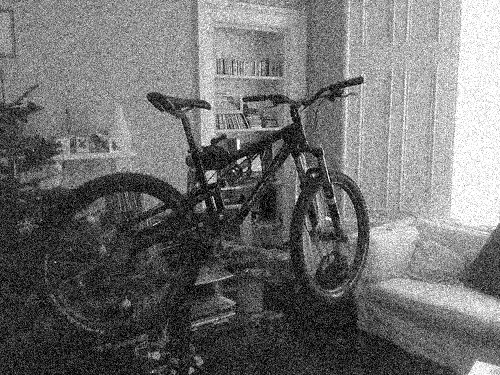

Zdjecie filtrowane funkcja wlasna


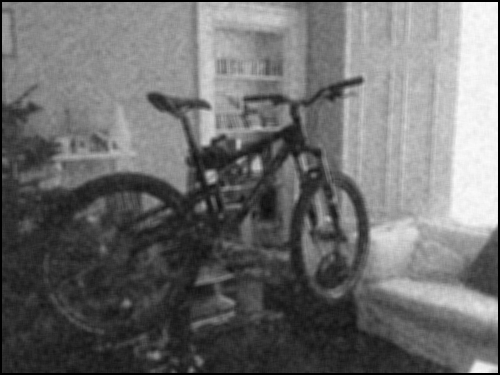

Zdjecie filtrowane funkcja wbudowana


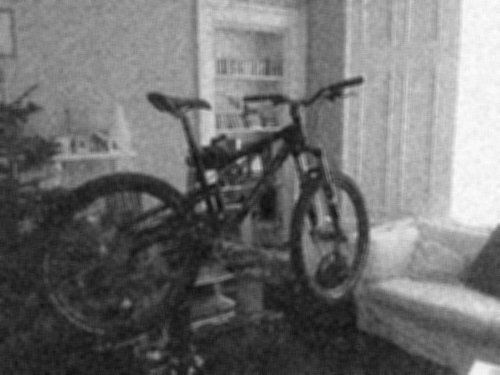

2.563866376876831           0.0003294944763183594
Zdjecie oryginalne


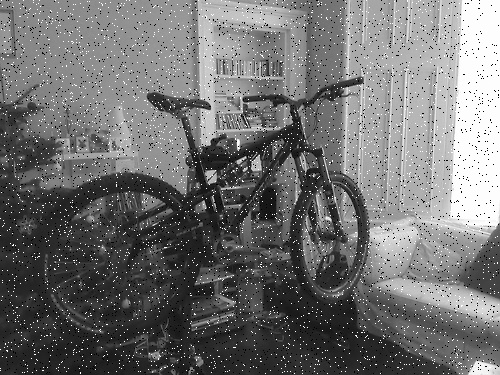

Zdjecie filtrowane funkcja wlasna


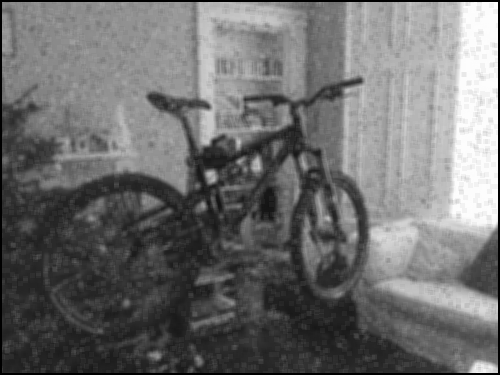

Zdjecie filtrowane funkcja wbudowana


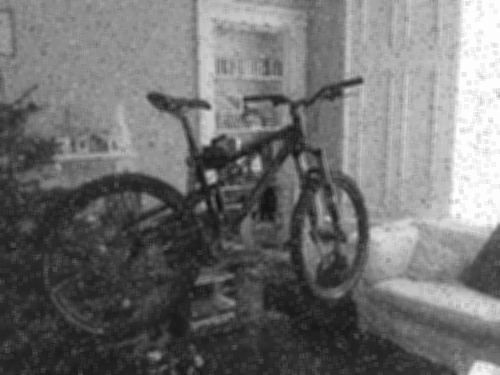

2.179948091506958           0.00022530555725097656


In [ ]:
def porownanie_mean_5(img):

  start = time.time()
  img_mean_5 = meanFilter_5(img)
  end = time.time()
  time_funkcja_wlasna = end - start
  print('Zdjecie oryginalne')
  cv2_imshow(img)
  print('Zdjecie filtrowane funkcja wlasna')
  cv2_imshow(img_mean_5)
  src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  start = time.time()
  dst = cv2.blur(src,(5, 5))
  end = time.time()
  time_funkcja_wbudowana = end - start
  print('Zdjecie filtrowane funkcja wbudowana')
  cv2_imshow(dst)
  print(time_funkcja_wlasna, '         ', time_funkcja_wbudowana)

porownanie_mean_5(ga1)
porownanie_mean_5(sp1)

# obie funkcje daja porownywalne wyniki, jesli jednak 
# chodzi o czas wykonywania programu, funkcja wbudowana 
# jest niemal 1200 - 1400 razy szybsza
# filtr lepiej filtruje obrazy zaszumione filtrem gaussa
# niz fitrem sol pieprz (tutaj pozostaja widoczne miejsca po zaszumieniu,
# jednak mniej niz w ywpadku uzycia filtra 3x3)
# filtr 5x5 lepiej przefiltrowal obrazy, ale zdecydowanie bardziej je rozmyl

In [ ]:
import math

def Gaussian_filter(img, sig):

  l = 5
  ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
  xx, yy = np.meshgrid(ax, ax)
  kernel = (1/(2*math.pi*sig*sig))*np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
  gkernel =  kernel / np.sum(kernel)
  dst = cv2.filter2D(img,-1, gkernel) 

  return dst



In [ ]:
def porownanie_gaussian(img, sig):

  start = time.time() 
  img_gaussian = Gaussian_filter(img, sig)
  end = time.time()
  time_funkcja_wlasna = end - start
  print('Zdjecie oryginalne')
  cv2_imshow(img)
  print('Zdjecie filtrowane funkcja wlasna')
  cv2_imshow(img_gaussian)
  src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  start = time.time()
  dst = cv2.GaussianBlur(src, (5, 5), sig)
  end = time.time()
  time_funkcja_wbudowana = end - start
  print('Zdjecie filtrowane funkcja wbudowana')
  cv2_imshow(dst)
  print(time_funkcja_wlasna, '         ', time_funkcja_wbudowana)

print('Wyniki otrzymane dla parametru sigma = 0.1')
porownanie_gaussian(ga1, 0.1)
porownanie_gaussian(sp1, 0.1)

print('Wyniki otrzymane dla parametru sigma = 0.5')
porownanie_gaussian(ga1, 0.5)
porownanie_gaussian(sp1, 0.5)

print('Wyniki otrzymane dla parametru sigma = 1')
porownanie_gaussian(ga1, 1)
porownanie_gaussian(sp1, 1)

# obie funkcje daja porownywalne wyniki, jesli jednak 
# chodzi o czas wykonywania programu, funkcja wbudowana 
# jest niemal 20 - 45 razy szybsza
# filtr lepiej filtruje obrazy zaszumione filtrem gaussa
# niz fitrem sol pieprz (tutaj pozostaja widoczne miejsca po zaszumieniu)
# wybor parametru sigma = 0.1 sprawia, ze filtracja jest niemal niewidoczna,
# przy wyborze parametru sigma = 0.5 filtracja zaczyna byc widoczna
# przy wyborze parametru sigma = 1 filtracja jest na podobnym poziomie jak 
# w wypadku filtra sredniej arytmetycznej


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def Median_filter(img):
  output = np.zeros(img.shape)
  filter_array = [img[0][0]] * 9

  def evaluate_filter_array(array):
    return array[0]

 
  for j in range(1, img.shape[0]-1):
      for i in range(1, img.shape[1]-1):
          filter_array[0] = img[j-1, i-1]
          filter_array[1] = img[j, i-1]
          filter_array[2] = img[j+1, i-1]
          filter_array[3] = img[j-1, i]
          filter_array[4] = img[j, i]
          filter_array[5] = img[j+1, i]
          filter_array[6] = img[j-1, i+1]
          filter_array[7] = img[j, i+1]
          filter_array[8] = img[j+1, i+1]
          
          filter_array.sort(key = evaluate_filter_array)
          output[j][i] = filter_array[4]
  
  return output


In [1]:
def porownanie_median(img):

  start = time.time()
  img_median = Median_filter(img)
  end = time.time()
  time_funkcja_wlasna = end - start
  print('Zdjecie oryginalne')
  cv2_imshow(img)
  print('Zdjecie filtrowane funkcja wlasna')
  cv2_imshow(img_median)
  src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  start = time.time()
  dst = cv2.medianBlur(src, 3)
  end = time.time()
  time_funkcja_wbudowana = end - start
  print('Zdjecie filtrowane funkcja wbudowana')
  cv2_imshow(dst)
  print(time_funkcja_wlasna, '         ', time_funkcja_wbudowana)


porownanie_median(sp1)
porownanie_median(ga1)

# obie funkcje daja porownywalne wyniki, jesli jednak 
# chodzi o czas wykonywania programu, funkcja wbudowana 
# jest niemal 3200 - 5300 razy szybsza
# filtr lepiej filtruje obrazy zaszumione filtrem sol - pieprz
# niz fitrem gaussa 


NameError: ignored

In [3]:
import math

# Funkcja obliczająca wartość funkcji D dla danego kąta θ
def calculate_D(theta, g, h, v0):
    theta_rad = math.radians(theta) # konwersja kąta na radiany
    v0x = v0 * math.cos(theta_rad) # prędkość początkowa wzdłuż osi x
    v0y = v0 * math.sin(theta_rad) # prędkość początkowa wzdłuż osi y
    t = (v0y + math.sqrt(v0y**2 + 2*g*h)) / g # czas lotu
    d = v0x * t # zasięg rzutu
    d = -(v0 * math.cos(theta_rad) * math.sqrt(2 * ((v0 * math.sin(theta_rad))**2 / (2 * g) + h) / g))
    return d

# Implementacja algorytmu Fibonacciego
def fibonacciego(N, a, b, g, h, v0):
    F = [1, 1] # liczby Fibonacciego
    for i in range(2, N+1):
        F.append(F[i-1] + F[i-2])
    
    for i in range(1, N-1):
        x1 = F[N-i-1] / F[N-i+1] * (b - a) + a
        x2 = F[N-i] / F[N-i+1] * (b - a) + a
        D1 = calculate_D(x1, g, h, v0)
        D2 = calculate_D(x2, g, h, v0)
        
        if D2 > D1:
            a = a
            b = x2
        else:
            a = x1
            b = b
    
    theta = (a + b) / 2 # wartość kąta θ, dla którego D jest maksymalna
    return theta

# Dane wejściowe
g = 9.81 # przyspieszenie grawitacyjne [m/s^2]
h = 90 # wysokość początkowa [m]
v0 = 68 # prędkość początkowa [m/s]
a = 0 # początkowy przedział niepewności dla kąta θ [stopnie]
b = 80 # końcowy przedział niepewności dla kąta θ [stopnie]
N = 6 # liczba obserwacji

theta_max = fibonacciego(N, a, b, g, h, v0)
theta_max_deg = math.degrees(theta_max) # konwersja kąta na stopnie
thetha_max_deg = theta_max_deg % 360


print("Wartość kąta θ (w stopniach), dla którego wartość D jest maksymalna: {:.2f} stopni".format(theta_max_deg))


Wartość kąta θ (w stopniach), dla którego wartość D jest maksymalna: 1762.95 stopni


In [7]:
import math

# Funkcja obliczająca wartość funkcji D dla danego kąta θ
def calculate_D(theta, g, h, v0):
    theta_rad = math.radians(theta) # konwersja kąta na radiany
    v0x = v0 * math.cos(theta_rad) # prędkość początkowa wzdłuż osi x
    v0y = v0 * math.sin(theta_rad) # prędkość początkowa wzdłuż osi y
    t = (v0y + math.sqrt(v0y**2 + 2*g*h)) / g # czas lotu
    d = -(v0x * t) # zasięg rzutu
    #d = -(v0 * math.cos(theta_rad) * math.sqrt(2 * ((v0 * math.sin(theta_rad))**2 / (2 * g) + h) / g))
    
    return d

# Implementacja algorytmu Fibonacciego
def fibonacciego(N, a, b, g, h, v0):
    F = [1, 1] # liczby Fibonacciego
    for i in range(2, N+1):
        F.append(F[i-1] + F[i-2])
    
    for i in range(1, N-1):
        x1 = F[N-i-1] / F[N-i+1] * (b - a) + a
        x2 = F[N-i] / F[N-i+1] * (b - a) + a
        D1 = calculate_D(x1, g, h, v0)
        D2 = calculate_D(x2, g, h, v0)
        
        if D2 > D1:
            a = a
            b = x2
        else:
            a = x1
            b = b
    
    theta = (a + 0.0002 + b) / 2 # wartość kąta θ, dla którego D jest maksymalna
    return theta

# Dane wejściowe
g = 9.81 # przyspieszenie grawitacyjne [m/s^2]
h = 90 # wysokość początkowa [m]
v0 = 68 # prędkość początkowa [m/s]
a = 0 # początkowy przedział niepewności dla kąta θ [stopnie]
b = 80 # końcowy przedział niepewności dla kąta θ [stopnie]
N = 6 # liczba obserwacji

theta_max = fibonacciego(N, a, b, g, h, v0)
theta_max_deg = math.degrees(theta_max) # konwersja kąta na stopnie
thetha_max_deg = theta_max_deg % 360


print("Wartość kąta θ (w stopniach), dla którego wartość D jest maksymalna: {:.2f} stopni".format(theta_max_deg))


Wartość kąta θ (w stopniach), dla którego wartość D jest maksymalna: 2468.13 stopni


In [27]:
import math

# Funkcja obliczająca wartość funkcji D dla danego kąta θ
def calculate_D(theta, g, h, v0):
    theta_rad = math.radians(theta) # konwersja kąta na radiany
    v0x = v0 * math.cos(theta_rad) # prędkość początkowa wzdłuż osi x
    v0y = v0 * math.sin(theta_rad) # prędkość początkowa wzdłuż osi y
    t = (v0y + math.sqrt(v0y**2 + 2*g*h)) / g # czas lotu
    d = v0x * t # zasięg rzutu
    #d = v0 * math.cos(theta_rad) * math.sqrt(2 * ((v0 * math.sin(theta_rad))**2 / (2 * g) + h) / g)

    return d

# Implementacja algorytmu Fibonacciego
def fibonacciego(N, a, b, g, h, v0):
    F = [1, 1] # liczby Fibonacciego
    for i in range(2, N+1):
        F.append(F[i-1] + F[i-2])
    
    for i in range(1, N-1):
        x1 = F[N-i-1] / F[N-i+1] * (b - a) + a
        x2 = F[N-i] / F[N-i+1] * (b - a) + a
        D1 = calculate_D(x1, g, h, v0)
        D2 = calculate_D(x2, g, h, v0)
        
        if D2 > D1:
            a = a
            b = x2
        else:
            a = x1
            b = b
    
    theta = (a + b) / 2 # wartość kąta θ, dla którego D jest maksymalna
    return theta

# Dane wejściowe
g = 9.81 # przyspieszenie grawitacyjne [m/s^2]
h = 90 # wysokość początkowa [m]
v0 = 68 # prędkość początkowa [m/s]
a = 0 # początkowy przedział niepewności dla kąta θ [stopnie]
b = 80 # końcowy przedział niepewności dla kąta θ [stopnie]
N = 6 # liczba obserwacji

theta_max = fibonacciego(N, a, b, g, h, v0)
theta_max_deg = math.degrees(theta_max) # konwersja kąta na stopnie

print("Wartość kąta θ (w stopniach), dla którego wartość D jest maksymalna: {:.2f} stopni".format(theta_max_deg))


Wartość kąta θ (w stopniach), dla którego wartość D jest maksymalna: 352.59 stopni


In [42]:
import math

def zasieg_rzutu(v0, theta, g, h):
    """
    Oblicza zasięg rzutu ukośnego z uwzględnieniem początkowej wysokości h.
    
    Args:
        v0 (float): Prędkość początkowa [m/s]
        theta (float): Kąt rzutu [radiany]
        g (float): Przyspieszenie grawitacyjne [m/s^2]
        h (float): Początkowa wysokość [m]
    
    Returns:
        float: Zasięg rzutu ukośnego [m]
    """
    term1 = (v0**2 * math.sin(2*theta)) / g
    term2 = (v0**2 * math.sin(theta)**2) / g**2 * (1 + 2 * g * h / (v0**2 * math.sin(theta)**2))**0.5
    
    D = term1 + term2
    return D

# Przykładowe dane
v0 = 68  # prędkość początkowa [m/s]
theta = math.radians(45)  # kąt rzutu [radiany]
g = 9.81  # przyspieszenie grawitacyjne [m/s^2]
h = 90  # początkowa wysokość [m]

# Obliczenie zasięgu rzutu ukośnego
D = zasieg_rzutu(v0, theta, g, h)

# Wyświetlenie wyniku
print("Zasięg rzutu ukośnego: {:.2f} m".format(D))


Zasięg rzutu ukośnego: 503.26 m
